In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NX=300
NY=300
w_i = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]) # weights
c_ai = np.array([[0, 1, 0, -1,  0, 1, -1, -1,  1],  # velocities, x components
              [0, 0, 1,  0, -1, 1,  1, -1, -1]]) # velocities, y components

In [3]:
#
rho_ij = np.ones((NX,NY))  # The measured scalar density field
u_cij  = np.zeros((2,NX,NY)) # The measured velocity field

In [4]:
f_inm=np.einsum('i,jk->ijk',w_i,np.ones((NX,NY))) # product of two arrays

In [5]:
rho=np.einsum('ijk->jk',f_inm)

$u_{nm}=\sum_j c_j f_{jnm}/\rho_{nm}$

In [6]:
f=np.einsum('i,jk->ijk',w_i,np.ones((NX,NY))) # product of two arrays
eps=0.01
f[1,:,:]=f[1,:,:]+eps
f[2,:,:]=f[2,:,:]+eps
u_cij=np.einsum('ij,jkl->ikl',c_ai,f)

In [7]:
f[1]=np.roll(f[1],(0,1))

In [8]:
u_cij=np.einsum('ij,jkl->ikl',c_ai,f)

In [9]:
f=np.einsum('i,jk->ijk',w_i,np.ones((NX,NY))) # product of two arrays

In [10]:
f[:,5,5]=f[:,5,5]-eps

In [11]:
rho=np.einsum('ijk->jk',f)

In [12]:
rho.sum()

89999.91

In [13]:
u_cij=np.einsum('ij,jkl->ikl',c_ai,f)

In [14]:
v=np.sin(2*np.pi*np.linspace(0,10,10)/10.)

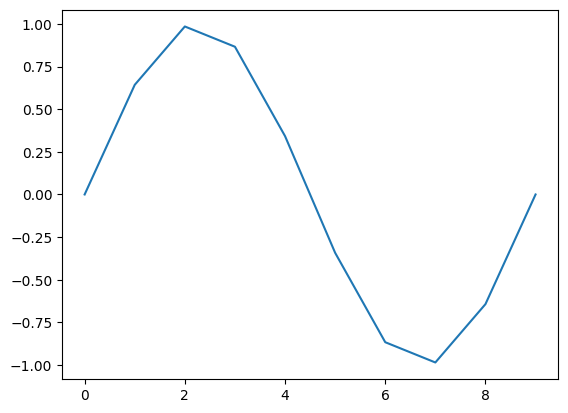

In [15]:
plt.plot(v)

In [16]:
v.shape

(10,)

In [17]:
u_new=np.zeros((2,NX,NY))
for i in np.arange(10):
    u_new[0,i,:]=u_cij[0,i,:]+v[i,np.newaxis]

In [18]:
f

array([[[0.44444444, 0.44444444, 0.44444444, ..., 0.44444444,
         0.44444444, 0.44444444],
        [0.44444444, 0.44444444, 0.44444444, ..., 0.44444444,
         0.44444444, 0.44444444],
        [0.44444444, 0.44444444, 0.44444444, ..., 0.44444444,
         0.44444444, 0.44444444],
        ...,
        [0.44444444, 0.44444444, 0.44444444, ..., 0.44444444,
         0.44444444, 0.44444444],
        [0.44444444, 0.44444444, 0.44444444, ..., 0.44444444,
         0.44444444, 0.44444444],
        [0.44444444, 0.44444444, 0.44444444, ..., 0.44444444,
         0.44444444, 0.44444444]],

       [[0.11111111, 0.11111111, 0.11111111, ..., 0.11111111,
         0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111,
         0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111,
         0.11111111, 0.11111111],
        ...,
        [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111,
         0.11111111, 0.11111111],
        [0.1

In [19]:
np.ones(10,dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
1//3

0

In [21]:
#ar = np.zeros((NX,NY))
#ar[NX//2,NY//2] = 1.0
f_inm[5] = f_inm[5]*1.01
f_inm[7] = f_inm[7]*0.99

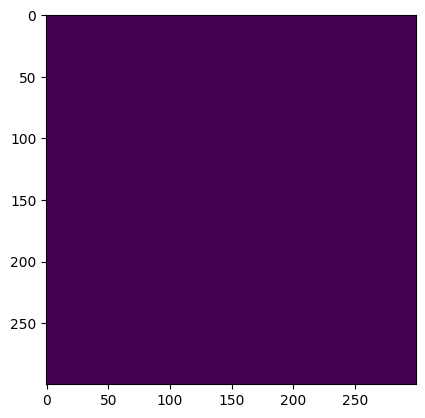

In [22]:
#%matplotlib inline
rho=np.einsum ('inm->nm',f_inm)
#rho[NX//2,NY//2] = 1.01
for i in np.arange(1,9):
    f_inm[i] = np.roll(f_inm[i], shift = c_ai.T[i], axis = [0,1])
#ar = np.roll(ar, shift = c_ai.T[5], axis = [0,1] )
#
fig, ax = plt.subplots()
ax.imshow(rho)
#ax.imshow(ar)
plt.show()

In [23]:
f_inm[:,NX//2,NY//2] = 1.01*f_inm[:,NX//2,NY//2]

In [24]:
f_inm[:,NX//2,NY//2] 

array([0.44888889, 0.11222222, 0.11222222, 0.11222222, 0.11222222,
       0.02833611, 0.02805556, 0.027775  , 0.02805556])

In [25]:
c_ai.T.shape

(9, 2)

In [26]:
av_anm = np.einsum('ia,inm->anm',c_ai.T,f_inm)

In [27]:
np.einsum('a,anm->nm',c_ai.T[8],av_anm)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
ar_ij = np.zeros((NX,NY))
ar_ij[NX//2,NY//2] = 1.

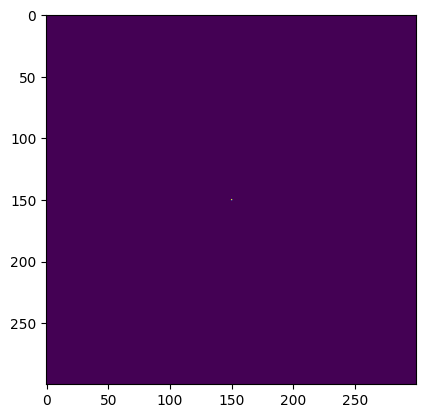

In [29]:
plt.imshow(ar_ij)
ar_ij = np.roll(ar_ij, shift = c_ai.T[5], axis = [0, 1])

In [30]:
c_ai.T[5]

array([1, 1])

In [31]:
rho_nm = np.einsum('inm->nm',f_inm)

In [32]:
m = np.arange(35).reshape((5,7))

In [33]:
m

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [34]:
np.einsum('ij->j',m)

array([ 70,  75,  80,  85,  90,  95, 100])

In [35]:
np.einsum('ijk->jk',f_inm)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [36]:
u_anm = np.ones((2,NX,NY))

In [37]:
u_anm[:,50,50]

array([1., 1.])

In [38]:
L = NY
x = np.arange(0,NX)
y = np.arange(0,NY)
v = np.sin(2.*np.pi/L*y)

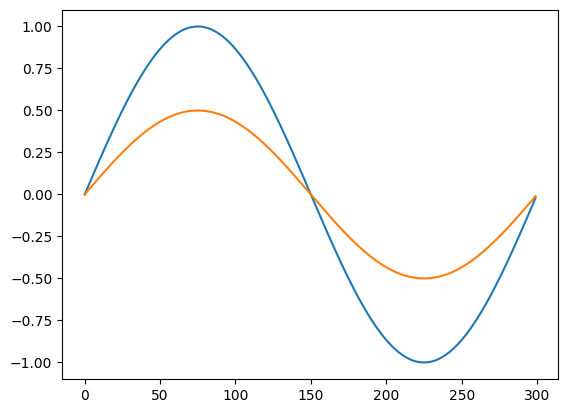

In [53]:
plt.plot(v)
plt.plot(0.5*v)

In [40]:
X, Y = np.meshgrid(x,y)

In [41]:
X

array([[  0,   1,   2, ..., 297, 298, 299],
       [  0,   1,   2, ..., 297, 298, 299],
       [  0,   1,   2, ..., 297, 298, 299],
       ...,
       [  0,   1,   2, ..., 297, 298, 299],
       [  0,   1,   2, ..., 297, 298, 299],
       [  0,   1,   2, ..., 297, 298, 299]])

In [42]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [297, 297, 297, ..., 297, 297, 297],
       [298, 298, 298, ..., 298, 298, 298],
       [299, 299, 299, ..., 299, 299, 299]])

In [43]:
ux = np.sin(2.*np.pi/L*Y)
uy = np.zeros((NX,NY))

In [44]:
ux.shape

(300, 300)

In [45]:
uy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
u = np.stack((ux,uy), axis = 0)

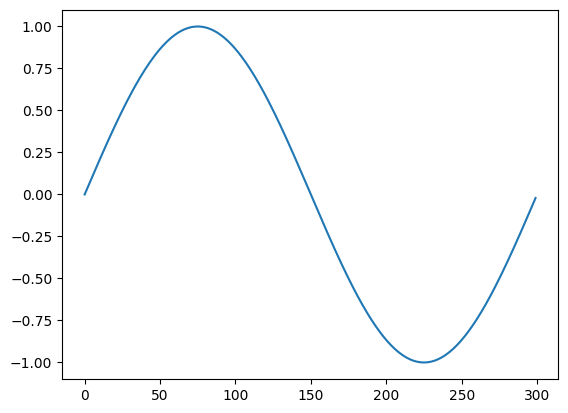

In [47]:
plt.plot(u[0,:,51])

In [48]:
u_anm_x_c_ai = np.einsum('ai,anm->inm',c_ai,u_anm)

In [49]:
u_anm_x_u_anm = np.einsum('anm->nm',u**2)

In [50]:
u_anm_x_u_anm[np.newaxis,:,:]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.00043858, 0.00043858, 0.00043858, ..., 0.00043858,
         0.00043858, 0.00043858],
        [0.00175357, 0.00175357, 0.00175357, ..., 0.00175357,
         0.00175357, 0.00175357],
        ...,
        [0.00394265, 0.00394265, 0.00394265, ..., 0.00394265,
         0.00394265, 0.00394265],
        [0.00175357, 0.00175357, 0.00175357, ..., 0.00175357,
         0.00175357, 0.00175357],
        [0.00043858, 0.00043858, 0.00043858, ..., 0.00043858,
         0.00043858, 0.00043858]]])

In [51]:
u_anm

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])